Title
Pneumonia Detection Using Convolutional Neural Networks on Chest X-Ray Images

Description
Problem Statement
Pneumonia is a significant cause of morbidity and mortality worldwide, particularly affecting children, the elderly, and individuals with compromised immune systems. Early detection and treatment are crucial to reducing the impact of this disease. Traditional methods of diagnosing pneumonia involve radiologists analyzing chest X-ray images, which is time-consuming and prone to human error. It is important to develop a deep learning model to automatically detect pneumonia from chest X-ray images, potentially assisting healthcare professionals in making faster and more accurate diagnoses.

Data
Choice of Data
The dataset used for this project is the "Chest X-Ray Images (Pneumonia)" dataset, which contains 5,856 X-ray images classified into two categories: Normal and Pneumonia (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9759647/) National Institutes of Health.The dataset is divided into training, validation, and test sets. This dataset is chosen because it provides a substantial amount of labeled data, essential for training a deep learning model, and reflects real-world scenarios where accurate detection of pneumonia from X-ray images is critical.

Relation to the Problem
The dataset is directly relevant to the problem of pneumonia detection, as it includes images of both healthy individuals and patients diagnosed with pneumonia. By training a model on this dataset, we aim to develop a system capable of distinguishing between normal and pneumonia-affected X-rays, thus automating part of the diagnostic process.

Data Preparation
Why Data Preparation is Necessary
Data preparation is a crucial step in building a machine learning model. It involves cleaning and preprocessing the data to ensure that the model can learn effectively from it. For our image data, this includes resizing images, normalizing pixel values, and applying data augmentation (artificially generating new data from existing data, primarily to train new machine learning (ML) models) to increase the diversity of the training set. This helps improve the model's generalization capability.

How to Prepare the Data
Rescaling: Normalize pixel values to the range [0, 1] by dividing by 255.
Data Augmentation: Apply random transformations such as rotation, width/height shift, shear, zoom, and horizontal flip to increase the variability of the training data.

Training
Model Architecture
A Convolutional Neural Network (CNN) was designed with multiple convolutional layers, batch normalization, and dropout layers to prevent overfitting and enhance the model's learning capacity.
Compilation and Training
The model was compiled with the Adam optimizer (learning rate: 0.0001) and binary cross-entropy loss function. Early stopping and model checkpointing were used to prevent overfitting and save the best performing model.

Results
Model Performance
The model achieved an accuracy of approximately 88% on the test set.
Visualization
The training and validation accuracy and loss curves were plotted to analyze the model's learning process.

Importance of the Results to the Problem
Relevance to Healthcare
The current model's accuracy of 88% is a promising step toward automated pneumonia detection using chest X-rays. However, for clinical applications, higher accuracy (e.g., 98%) is essential to minimize the risk of misdiagnosis. 

Recommendations
To achieve the desired performance, further improvements are necessary:

Enhance Model Complexity: Adding more convolutional layers or using pre-trained models like ResNet or DenseNet.
Aggressive Data Augmentation: Applying more diverse augmentation techniques to improve robustness.
Regularization: Increasing dropout rates and applying L2 regularization.
Hyperparameter Tuning: Systematic search for optimal hyperparameters.
Evaluation Metrics: Focusing on precision, recall, and F1-score to ensure balanced performance in medical diagnosis.

# import the required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [2]:
# Set paths to the dataset directories
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

In [3]:
categories = ['NORMAL', 'PNEUMONIA']

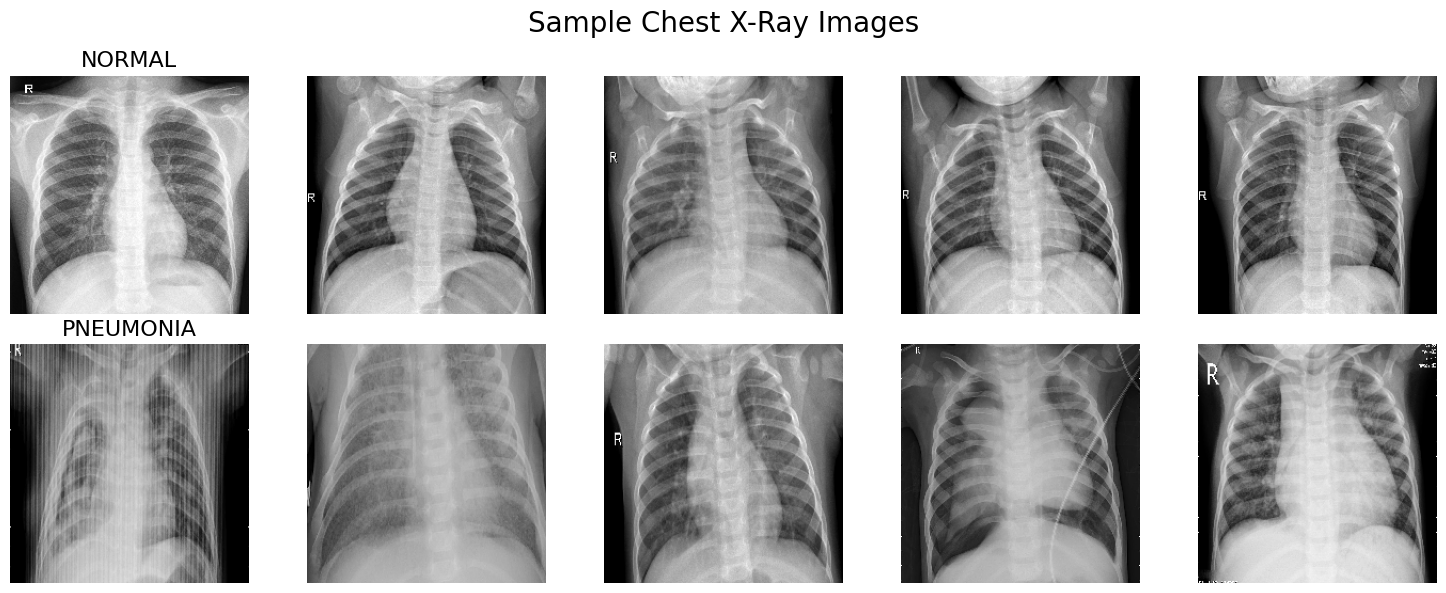

In [4]:
# Function to display sample images
def display_sample_images(num_images=5):
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
    fig.suptitle('Sample Chest X-Ray Images', fontsize=20)
    
    for i, category in enumerate(categories):
        category_dir = os.path.join(train_dir, category)
        images = os.listdir(category_dir)
        sample_images = random.sample(images, num_images)
        
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(category_dir, img_name)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)
            
            ax = axes[i, j]
            ax.imshow(img_array.astype('uint8'))
            ax.axis('off')
            if j == 0:
                ax.set_title(category, fontsize=16)
    
    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images()

In [5]:
# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0, 1]
    rotation_range=20,           # Randomly rotate images by 20 degrees
    width_shift_range=0.2,       # Randomly translate images horizontally by 20%
    height_shift_range=0.2,      # Randomly translate images vertically by 20%
    shear_range=0.2,             # Shear transformations
    zoom_range=0.2,              # Randomly zoom into images by 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill in new pixels with the nearest value
)

In [6]:
# Normalization for validation and test data
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),      # Resize images to 224x224 pixels
    batch_size=32,               # Number of images to be yielded from the generator per batch
    class_mode='binary'          # Binary labels (normal vs. pneumonia)
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),      
    batch_size=32,               
    class_mode='binary'          
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),      
    batch_size=32,               
    class_mode='binary'          
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


BUILD A CNN MODEL

In [8]:
# required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.layers import BatchNormalization, Activation

# Build the CNN model
model = Sequential([
    Input(shape=(224, 224, 3)),                                      # Input layer
    Conv2D(32, (3, 3), padding='same'),                           	 # 32 filters, 3x3 kernel, ReLU activation
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),                                            # Max pooling with 2x2 pool size
    Conv2D(64, (3, 3), padding='same'),                              # 64 filters, 3x3 kernel, ReLU activation
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),                                            # Max pooling with 2x2 pool size
    Conv2D(128, (3, 3), padding='same'),                             # 128 filters, 3x3 kernel, ReLU activation
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),                                            # Max pooling with 2x2 pool size
    Flatten(),                                                       # Flatten the 3D output to 1D
    Dense(256),                                                      # Fully connected layer with 128 units and ReLU activation
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),                                                    # Dropout layer with 50% dropout rate to prevent overfitting
    Dense(1, activation='sigmoid')                                   # Output layer with 1 unit and sigmoid activation (for binary classification)
])

In [9]:
# Compile the model with adjusted learning rate and optimizer
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Calculate steps_per_epoch and validation_steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

TRAIN THE MODEL

In [11]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=10
)

Epoch 1/10


C:\janet\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.7930 - loss: 0.4873 - val_accuracy: 0.5000 - val_loss: 1.9171
Epoch 2/10


C:\Users\Liam\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.9171
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.8945 - loss: 0.2862 - val_accuracy: 0.5000 - val_loss: 2.5339
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 2.5339
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9164 - loss: 0.2238 - val_accuracy: 0.5000 - val_loss: 1.3986
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.3986
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.9159 - loss: 0.2124 - val_accuracy: 0.5000 - val_loss: 2.7969
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 2.7969
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9274 - loss: 

EVALUATION

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_acc * 100}')
print(f'Test Loss: {test_loss}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 405ms/step - accuracy: 0.8704 - loss: 0.3352
Test Accuracy: 88.48684430122375
Test Loss: 0.3227550685405731


In [14]:
# Save the model in the recommended Keras format
model.save('pneumonia_detection_model.keras')

In [15]:
# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

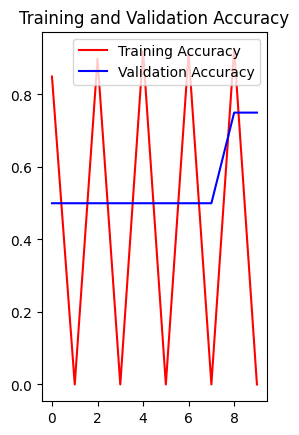

In [16]:
# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

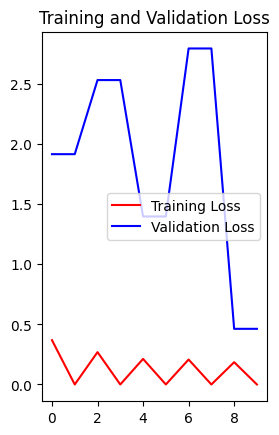

In [17]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()